In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
df=pd.read_csv("data/finalTrain.csv")


In [5]:
df.head()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken (min)
0,0xcdcd,DEHRES17DEL01,36.0,4.2,30.327968,78.046106,30.397968,78.116106,12-02-2022,21:55,22:10,Fog,Jam,2,Snack,motorcycle,3.0,No,Metropolitian,46
1,0xd987,KOCRES16DEL01,21.0,4.7,10.003064,76.307589,10.043064,76.347589,13-02-2022,14:55,15:05,Stormy,High,1,Meal,motorcycle,1.0,No,Metropolitian,23
2,0x2784,PUNERES13DEL03,23.0,4.7,18.562450,73.916619,18.652450,74.006619,04-03-2022,17:30,17:40,Sandstorms,Medium,1,Drinks,scooter,1.0,No,Metropolitian,21
3,0xc8b6,LUDHRES15DEL02,34.0,4.3,30.899584,75.809346,30.919584,75.829346,13-02-2022,09:20,09:30,Sandstorms,Low,0,Buffet,motorcycle,0.0,No,Metropolitian,20
4,0xdb64,KNPRES14DEL02,24.0,4.7,26.463504,80.372929,26.593504,80.502929,14-02-2022,19:50,20:05,Fog,Jam,1,Snack,scooter,1.0,No,Metropolitian,41


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45584 entries, 0 to 45583
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           45584 non-null  object 
 1   Delivery_person_ID           45584 non-null  object 
 2   Delivery_person_Age          43730 non-null  float64
 3   Delivery_person_Ratings      43676 non-null  float64
 4   Restaurant_latitude          45584 non-null  float64
 5   Restaurant_longitude         45584 non-null  float64
 6   Delivery_location_latitude   45584 non-null  float64
 7   Delivery_location_longitude  45584 non-null  float64
 8   Order_Date                   45584 non-null  object 
 9   Time_Orderd                  43853 non-null  object 
 10  Time_Order_picked            45584 non-null  object 
 11  Weather_conditions           44968 non-null  object 
 12  Road_traffic_density         44983 non-null  object 
 13  Vehicle_conditio

In [6]:
df.describe()

,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Vehicle_condition,multiple_deliveries,Time_taken (min)
count,43730.000000,43676.000000,45584.000000,45584.000000,45584.000000,45584.000000,45584.000000,44591.000000,45584.000000
mean,29.566911,4.633774,17.017948,70.229684,17.465480,70.844161,1.023385,0.744635,26.293963
std,5.815064,0.334744,8.185674,22.885575,7.335562,21.120578,0.839055,0.572510,9.384298
min,15.000000,1.000000,-30.905562,-88.366217,0.010000,0.010000,0.000000,0.000000,10.000000
25%,25.000000,4.500000,12.933284,73.170000,12.988453,73.280000,0.000000,0.000000,19.000000
50%,30.000000,4.700000,18.551440,75.897963,18.633934,76.002574,1.000000,1.000000,26.000000
75%,35.000000,4.900000,22.728163,78.044095,22.785049,78.107044,2.000000,1.000000,32.000000
max,50.000000,6.000000,30.914057,88.433452,31.054057,88.563452,3.000000,3.000000,54.000000


In [7]:
df.duplicated().sum()

0

In [8]:
df.isnull().sum()

ID                                0
Delivery_person_ID                0
Delivery_person_Age            1854
Delivery_person_Ratings        1908
Restaurant_latitude               0
Restaurant_longitude              0
Delivery_location_latitude        0
Delivery_location_longitude       0
Order_Date                        0
Time_Orderd                    1731
Time_Order_picked                 0
Weather_conditions              616
Road_traffic_density            601
Vehicle_condition                 0
Type_of_order                     0
Type_of_vehicle                   0
multiple_deliveries             993
Festival                        228
City                           1200
Time_taken (min)                  0
dtype: int64

# Calculating Distance Between Two Latitudes and Longitudes
## we doesn't have distance between restuarent to delivery location

In [9]:
'''using haversine formula'''
# lets set earth R radius in kilomiter
R=6378

## Convert degrees to radians 180

def deg_to_rad(degrees):
    return degrees * (np.pi/180)

##fuction to calculate between two points
def distcalculate(lat1, lon1, lat2, lon2):
    d_log=deg_to_rad(lon1-lon2)
    d_lat=deg_to_rad(lat1-lat2)
    
    a = np.sin(d_lat/2)**2 + np.cos(deg_to_rad(lat1)) * np.cos(deg_to_rad(lat2)) * np.sin(d_log/2)**2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1-a))
    return R * c

In [10]:
## creating distance feature to calculate the two point
df['Distance']=np.nan
''' now in distance feature adding disTCALCULATE VALUES'''
for i in range(len(df)):
    df.loc[i,'Distance']=distcalculate(df.loc[i,'Restaurant_latitude'],
                                       df.loc[i,'Restaurant_longitude'],
                                       df.loc[i,'Delivery_location_latitude'],
                                       df.loc[i,'Delivery_location_longitude']
                                      )


## from haversine formula we get distance value for calculate estimate time
### harversine formula is for calculating the  latitude and longitude

In [11]:
df.head()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,...,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken (min),Distance
0,0xcdcd,DEHRES17DEL01,36.0,4.2,30.327968,78.046106,30.397968,78.116106,12-02-2022,21:55,...,Fog,Jam,2,Snack,motorcycle,3.0,No,Metropolitian,46,10.291878
1,0xd987,KOCRES16DEL01,21.0,4.7,10.003064,76.307589,10.043064,76.347589,13-02-2022,14:55,...,Stormy,High,1,Meal,motorcycle,1.0,No,Metropolitian,23,6.249177
2,0x2784,PUNERES13DEL03,23.0,4.7,18.562450,73.916619,18.652450,74.006619,04-03-2022,17:30,...,Sandstorms,Medium,1,Drinks,scooter,1.0,No,Metropolitian,21,13.803009
3,0xc8b6,LUDHRES15DEL02,34.0,4.3,30.899584,75.809346,30.919584,75.829346,13-02-2022,09:20,...,Sandstorms,Low,0,Buffet,motorcycle,0.0,No,Metropolitian,20,2.933477
4,0xdb64,KNPRES14DEL02,24.0,4.7,26.463504,80.372929,26.593504,80.502929,14-02-2022,19:50,...,Fog,Jam,1,Snack,scooter,1.0,No,Metropolitian,41,19.417930


In [12]:
## handling missing values
df['Delivery_person_Age'].value_counts()

Delivery_person_Age
35.0    2261
36.0    2260
30.0    2226
37.0    2226
38.0    2218
24.0    2210
32.0    2201
22.0    2194
29.0    2191
33.0    2186
28.0    2179
25.0    2174
34.0    2165
26.0    2159
21.0    2153
27.0    2150
39.0    2144
20.0    2136
31.0    2120
23.0    2086
50.0      53
15.0      38
Name: count, dtype: int64

## numerical missing value

In [13]:
df['Delivery_person_Age'].fillna(df['Delivery_person_Age'].mean(), inplace=True)
df['Delivery_person_Ratings'].fillna(df['Delivery_person_Ratings'].mean(), inplace=True)
df['multiple_deliveries'].fillna(df['multiple_deliveries'].mean(), inplace=True)

In [14]:
df['multiple_deliveries'].value_counts()

multiple_deliveries
1.000000    28151
0.000000    14094
2.000000     1985
0.744635      993
3.000000      361
Name: count, dtype: int64

## categorical missing value

In [15]:
df['Weather_conditions']=df['Weather_conditions'].fillna('Sunny')

In [16]:
df['Road_traffic_density']=df['Road_traffic_density'].fillna('Low')

In [17]:
df['Festival']=df['Festival'].fillna('No')

In [18]:
df['City']=df['City'].fillna('Semi-Urban')

<Axes: >

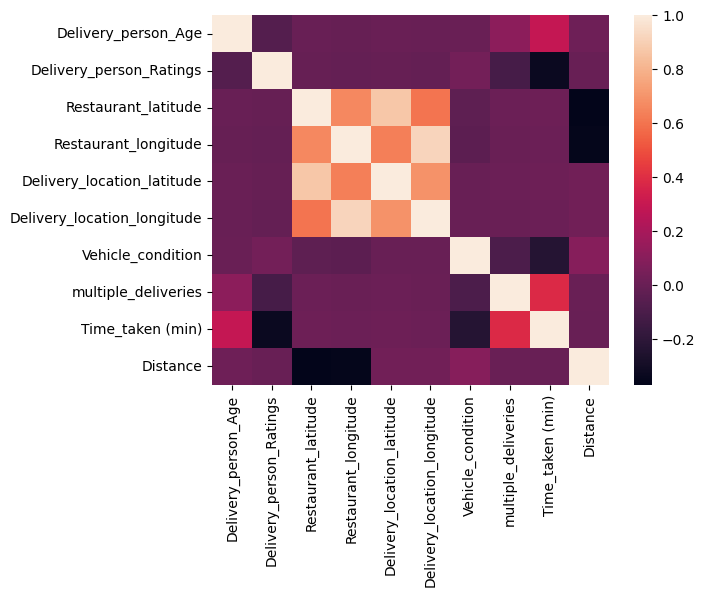

In [19]:
## correlation
corr=df.select_dtypes('number').corr()
sns.heatmap(corr)

In [20]:
df.head()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,...,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken (min),Distance
0,0xcdcd,DEHRES17DEL01,36.0,4.2,30.327968,78.046106,30.397968,78.116106,12-02-2022,21:55,...,Fog,Jam,2,Snack,motorcycle,3.0,No,Metropolitian,46,10.291878
1,0xd987,KOCRES16DEL01,21.0,4.7,10.003064,76.307589,10.043064,76.347589,13-02-2022,14:55,...,Stormy,High,1,Meal,motorcycle,1.0,No,Metropolitian,23,6.249177
2,0x2784,PUNERES13DEL03,23.0,4.7,18.562450,73.916619,18.652450,74.006619,04-03-2022,17:30,...,Sandstorms,Medium,1,Drinks,scooter,1.0,No,Metropolitian,21,13.803009
3,0xc8b6,LUDHRES15DEL02,34.0,4.3,30.899584,75.809346,30.919584,75.829346,13-02-2022,09:20,...,Sandstorms,Low,0,Buffet,motorcycle,0.0,No,Metropolitian,20,2.933477
4,0xdb64,KNPRES14DEL02,24.0,4.7,26.463504,80.372929,26.593504,80.502929,14-02-2022,19:50,...,Fog,Jam,1,Snack,scooter,1.0,No,Metropolitian,41,19.417930


## EDA

<Axes: ylabel='count'>

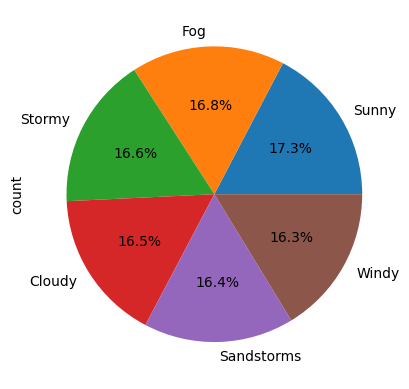

In [21]:
df['Weather_conditions'].value_counts().plot.pie(x='Weather_conditions',autopct='%1.1f%%')

<Axes: ylabel='count'>

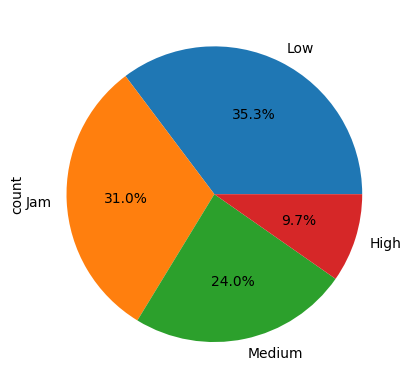

In [22]:
df['Road_traffic_density'].value_counts().plot.pie(x='Road_traffic_density',autopct='%1.1f%%')

<Axes: ylabel='count'>

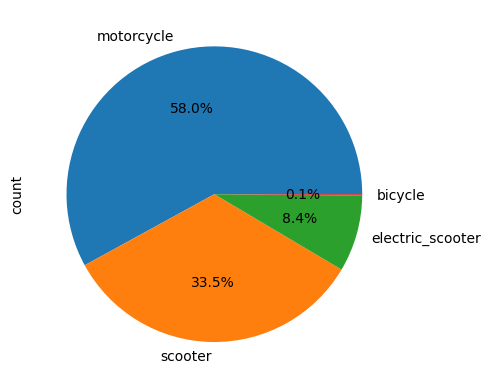

In [23]:
df['Type_of_vehicle'].value_counts().plot.pie(x='Type_of_vehicle',autopct='%1.1f%%')

/tmp/ipykernel_7202/3760677418.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Delivery_person_Ratings'])


<Axes: xlabel='Delivery_person_Ratings', ylabel='Density'>

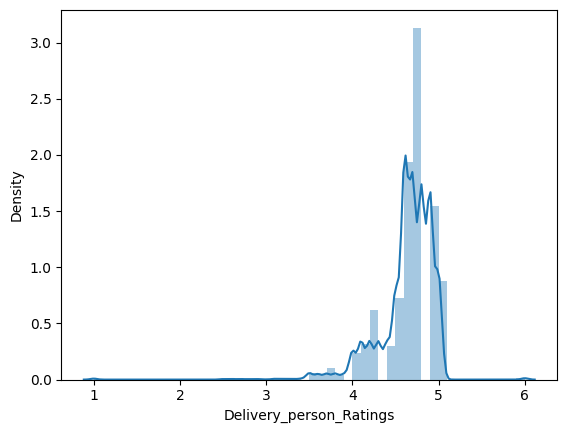

In [24]:
sns.distplot(df['Delivery_person_Ratings'])

<Axes: xlabel='Road_traffic_density', ylabel='Time_taken (min)'>

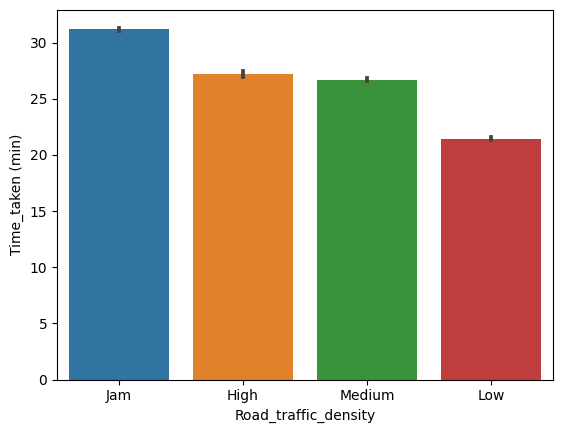

In [25]:
sns.barplot(x='Road_traffic_density',y='Time_taken (min)',data=df)

<Axes: xlabel='Weather_conditions', ylabel='Time_taken (min)'>

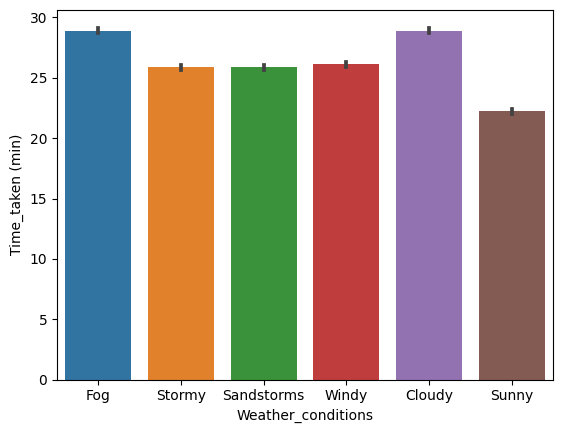

In [26]:
sns.barplot(x='Weather_conditions',y='Time_taken (min)',data=df)

In [27]:
df['Festival']=df['Festival'].str.replace('Yes','1')
df['Festival']=df['Festival'].str.replace('No','0')

In [28]:
df['Festival']=df['Festival'].astype(int)

In [29]:
## correlation
corr=df.select_dtypes('number').corr()


<Axes: >

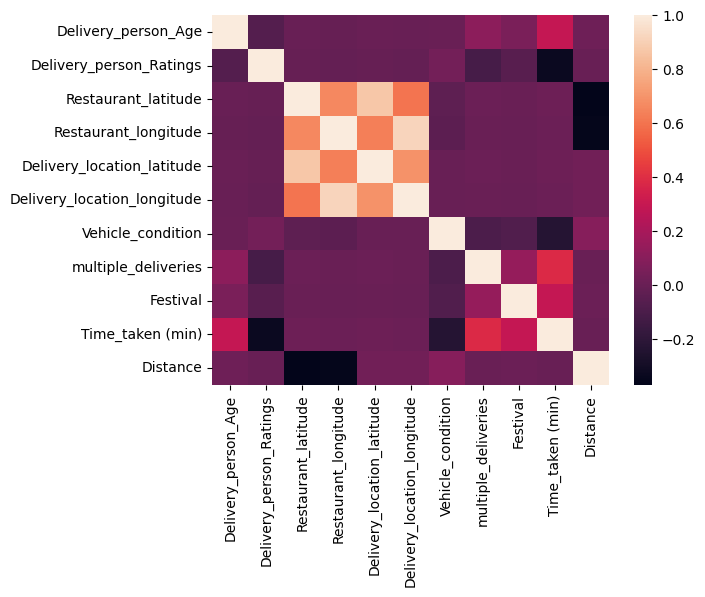

In [30]:
sns.heatmap(corr)

In [31]:
df['Type_of_order']

0         Snack
1          Meal
2        Drinks
3        Buffet
4         Snack
          ...  
45579      Meal
45580    Buffet
45581    Drinks
45582     Snack
45583     Snack
Name: Type_of_order, Length: 45584, dtype: object

## dropping features

In [32]:
def drop_features(df, feature):
    df = df.drop([feature], axis=1, inplace=True)
    return df

In [33]:
drop_features(df, 'ID')
drop_features(df, 'Delivery_person_ID')
drop_features(df, 'Restaurant_latitude')
drop_features(df, 'Restaurant_longitude')
drop_features(df, 'Delivery_location_latitude')
drop_features(df, 'Delivery_location_longitude')
drop_features(df, 'Order_Date')
drop_features(df, 'Time_Orderd')
drop_features(df, 'Time_Order_picked')
drop_features(df, 'Type_of_order')


In [35]:
df.to_csv("data/cleand_finalTrain.csv",index=False)
